# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import concurrent.futures 
import requests
from pprint import pprint
import json
import os
from citipy import citipy
import random
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline

CITIES_TOT = 1400
SETS_NUM = 50
API_KEY = os.environ.get('API_WEATHER_KEY')


In [2]:
random.seed(42)
ran_lat= [random.uniform(-90,90) for _ in range(CITIES_TOT)]
ran_long = [random.uniform(-180,180) for _ in range(CITIES_TOT)]
dd = list(zip(ran_lat,ran_long))
dd

[(25.096823722419074, -71.58556994896081),
 (-85.49806405991995, -162.81019921721355),
 (-40.494722693558536, -28.86280424876051),
 (-49.8220671332119, 105.80367911019772),
 (42.56481854952224, -15.439098010878467),
 (31.80590773612404, -140.0911576955946),
 (70.59232218687217, 145.85287883831944),
 (-74.35101012670509, 34.8260554148209),
 (-14.054072456651326, -174.08327320587802),
 (-84.63650050114734, 5.535262875386195),
 (-50.6451645353514, -92.9022716084424),
 (0.9639518586052276, -128.31233751134639),
 (-85.22352545690455, -25.473998482799857),
 (-54.209222876403274, 41.33144979934224),
 (26.97919880031418, -93.39687402964432),
 (8.089466508579008, -30.03566572492568),
 (-50.320688032674596, 59.17366862712328),
 (16.067823097663563, -149.17897620458575),
 (55.697482202008786, 170.87561674279982),
 (-88.83022325794902, -155.63544375281543),
 (55.04746532990541, 9.38140031598138),
 (35.66509109788083, 2.6379707687231644),
 (-28.754907026761465, 175.7993348147283),
 (-62.01369003387

## Generate Cities List

In [3]:
cities = []
def generate_cities(lat):
    for rows in lat:
        city = citipy.nearest_city(rows[0],rows[1])
        cities.append(city.city_name)

generate_cities(dd)

final_cities = list(set(cities))
final_cities_clean = [final_cities[i:i+SETS_NUM] for i in range(0, len(final_cities), SETS_NUM)]
len(final_cities_clean)

13

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
start = time.perf_counter()
json_data = []
print("""Beginning Data Retrieval     
---------------------------------------""")
def get_weather_data(cities,set_num):
    
    URL = "https://api.openweathermap.org/data/2.5/weather?"
    for enum,city in enumerate(cities,start=1):  
        parameters = {
            'q' : city,
            'appid' : API_KEY
            

        }
        try:           
            data_request = requests.get(URL,params =parameters ).json()
            print(f"Processing Record {enum} of {set_num}| {data_request['name']}")            
        except:
            print("City not found. Skipping...")
        finally:
            json_data.append(data_request)

    
    
for n in range(len(final_cities_clean)):
    get_weather_data(final_cities_clean[n],n+1)
    time.sleep(0.10)        

 
print("""-----------------------------
Data Retrieval Complete      
-----------------------------""")

finish = time.perf_counter()
print(f'Finished in {round((finish-start)/60, 2)} min(s)')

Beginning Data Retrieval     
---------------------------------------
Processing Record 1 of 1| Kulhudhuffushi
Processing Record 2 of 1| Port Alfred
Processing Record 3 of 1| Tinaquillo
Processing Record 4 of 1| Piaçabuçu
Processing Record 5 of 1| ‘Āhuimanu
City not found. Skipping...
Processing Record 7 of 1| Atuona
Processing Record 8 of 1| San Jerónimo
Processing Record 9 of 1| Bathsheba
Processing Record 10 of 1| Three Hills
Processing Record 11 of 1| Gamba
Processing Record 12 of 1| Makakilo City
City not found. Skipping...
Processing Record 14 of 1| Cherskiy
Processing Record 15 of 1| Iqaluit
Processing Record 16 of 1| Yumen
Processing Record 17 of 1| Narsaq
Processing Record 18 of 1| Caruray
Processing Record 19 of 1| Jovellar
Processing Record 20 of 1| Lebu
Processing Record 21 of 1| Lázaro Cárdenas
Processing Record 22 of 1| Ulaangom
Processing Record 23 of 1| Beloha
Processing Record 24 of 1| Santiago del Estero
Processing Record 25 of 1| Rumford
Processing Record 26 of 1| Pa

Processing Record 31 of 5| Ucluelet
Processing Record 32 of 5| Vallenar
City not found. Skipping...
Processing Record 34 of 5| Dadri
Processing Record 35 of 5| Pahrump
Processing Record 36 of 5| Am Timan
Processing Record 37 of 5| Belyy Yar
Processing Record 38 of 5| Pisco
Processing Record 39 of 5| Distrikt Brokopondo
Processing Record 40 of 5| Caconda
Processing Record 41 of 5| Zacualpa
Processing Record 42 of 5| Carnarvon
Processing Record 43 of 5| Sampit
City not found. Skipping...
Processing Record 45 of 5| Katobu
Processing Record 46 of 5| High Level
Processing Record 47 of 5| Coyhaique
Processing Record 48 of 5| Voyvozh
Processing Record 49 of 5| At-Bashi
Processing Record 50 of 5| Camacupa
Processing Record 1 of 6| San Ramon
Processing Record 2 of 6| Agirish
Processing Record 3 of 6| Quatre Cocos
Processing Record 4 of 6| Vaini
Processing Record 5 of 6| Kobelyaky
Processing Record 6 of 6| Fortuna
Processing Record 7 of 6| Daru
Processing Record 8 of 6| Tautira
Processing Record

City not found. Skipping...
Processing Record 12 of 10| Abu Dhabi
Processing Record 13 of 10| Anloga
Processing Record 14 of 10| San Cristobal
Processing Record 15 of 10| Arraial do Cabo
Processing Record 16 of 10| Broken Hill
Processing Record 17 of 10| Biak
Processing Record 18 of 10| Hilo
Processing Record 19 of 10| Lüderitz
Processing Record 20 of 10| Bilma
Processing Record 21 of 10| Danielskuil
Processing Record 22 of 10| Bengkulu
Processing Record 23 of 10| Ottawa
Processing Record 24 of 10| Acarí
Processing Record 25 of 10| Mildura
Processing Record 26 of 10| Burla
Processing Record 27 of 10| Vila Velha
Processing Record 28 of 10| Alihe
Processing Record 29 of 10| Altagracia de Orituco
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 33 of 10| Rāmgarh
Processing Record 34 of 10| Tacna
Processing Record 35 of 10| Itoman
Processing Record 36 of 10| Cervo
Processing Record 37 of 10| Samandağ
City not found. Skipping...
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
city_name = []
latitude = []
longitude =  []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
for data in json_data:
    try:
        city_name.append(data['name'])
        latitude.append(data['coord']['lat'])
        longitude.append(data['coord']['lon'])
        max_temp.append(data['main']['temp_max'])
        humidity.append(data['main']['humidity'])
        cloudiness.append(data['clouds']['all'])
        wind_speed.append(data['wind']['speed'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
    except:
        pass
    

    
df = pd.DataFrame({
    'City':city_name,
    'Lat':latitude,
    'Lng':longitude,
    'Max Temp':max_temp,
    'Humidity':humidity,
    'Cloudiness':cloudiness,
    'Wind Speed':wind_speed,
    'Country':country,
    'Date':date
})



df.sort_values(by = 'City',ascending = True,inplace = True)
df.drop_duplicates(inplace=True)
df.reset_index(drop = True,inplace = True)
df

#Exporting to CSV

df.to_csv("../output_data/weather.csv",encoding='utf-8',index=False)

In [24]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,20.767923,9.480328,290.495829,69.630237,48.112933,3.641967,1.602665e+09
std,32.814780,90.665953,11.077659,23.649121,38.609806,2.451437,8.447767e+01
min,-54.800000,-179.170000,261.150000,1.000000,0.000000,0.050000,1.602665e+09
25%,-6.640000,-70.230000,282.150000,57.000000,6.000000,1.790000,1.602665e+09
50%,24.470000,14.430000,293.150000,77.000000,41.000000,3.100000,1.602665e+09
75%,48.930000,82.180000,299.500000,88.000000,90.000000,4.980000,1.602665e+09
max,78.220000,179.320000,312.150000,100.000000,100.000000,17.000000,1.602665e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
#  Get the indices of cities that have humidity over 100%.
df_copy = df.copy()
df_humidity_100 = df_copy.loc[df['Humidity']>=100]
df_humidity_100.index

Int64Index([ 29,  70, 116, 150, 162, 164, 179, 184, 185, 199, 256, 332, 334,
            352, 356, 366, 371, 379, 386, 422, 457, 489, 527],
           dtype='int64')

In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = df_copy.drop(axis=0, index=df_humidity_100.index,inplace=False)
clean_city_data.reset_index(drop = True,inplace = True)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aabenraa,55.04,9.42,283.15,75,20,5.70,DK,1602665240
1,Abbeville,50.10,1.83,282.59,81,54,6.04,FR,1602664901
2,Aberystwyth,52.42,-4.08,281.48,99,8,0.45,GB,1602665184
3,Abu Dhabi,24.47,54.37,308.15,15,0,4.10,AE,1602665068
4,Abu Samrah,35.30,37.18,299.86,38,0,3.40,SY,1602665205
...,...,...,...,...,...,...,...,...,...
521,Zirándaro de los Chávez,18.45,-100.98,297.17,84,60,0.79,MX,1602665223
522,Zyryanovsk,49.74,84.27,283.04,50,1,0.84,KZ,1602665270
523,Ōmachi,36.50,137.87,289.82,74,48,2.68,JP,1602665100
524,Şahbuz,39.41,45.57,294.15,37,0,2.10,AZ,1602665182


In [27]:
clean_city_data['City'].value_counts()

Katobu       1
Zacualpa     1
San Ramon    1
Tyukhtet     1
Tocopilla    1
            ..
Honiara      1
Marzuq       1
Giyani       1
Lata         1
Hermanus     1
Name: City, Length: 526, dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

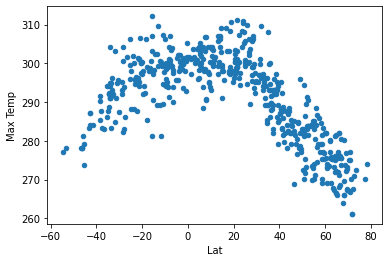

In [28]:
clean_city_data.plot(kind='scatter',x = 'Lat',y ='Max Temp' )
plt.show()

## Latitude vs. Humidity Plot

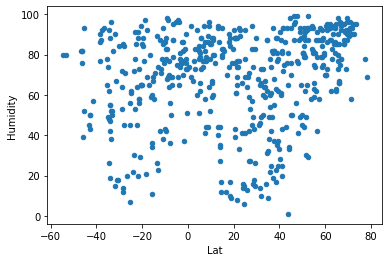

In [29]:
clean_city_data.plot(kind='scatter',x = 'Lat',y ='Humidity' )
plt.show()

## Latitude vs. Cloudiness Plot

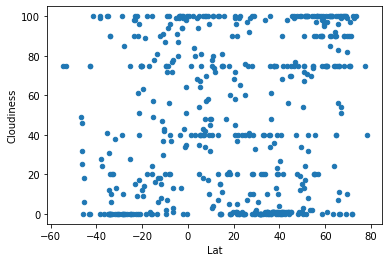

In [30]:
clean_city_data.plot(kind='scatter',x = 'Lat',y ='Cloudiness' )
plt.show()

## Latitude vs. Wind Speed Plot

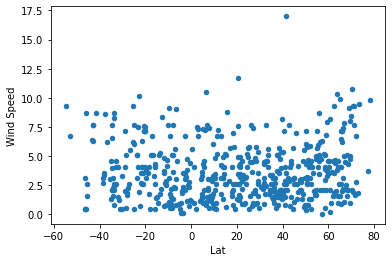

In [31]:
clean_city_data.plot(kind='scatter',x = 'Lat',y ='Wind Speed' )
plt.show()

## Linear Regression

In [32]:
north_hem = clean_city_data.copy()
north_hem = north_hem.loc[north_hem['Lng'] > 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

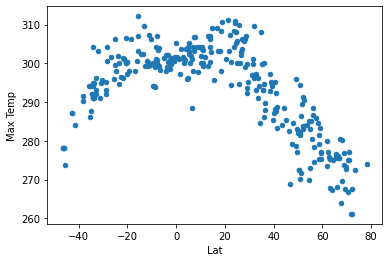

In [33]:
north_hem.plot(kind = 'scatter',x = 'Lat',y = 'Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

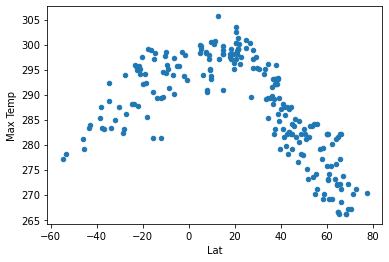

In [34]:
south_hem = clean_city_data.copy()
south_hem = south_hem.loc[south_hem['Lng'] < 0]
south_hem.plot(kind = 'scatter',x = 'Lat',y = 'Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

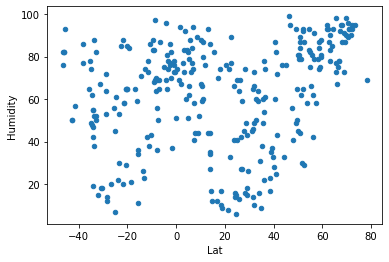

In [35]:
north_hem.plot(kind = 'scatter',x = 'Lat',y = 'Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

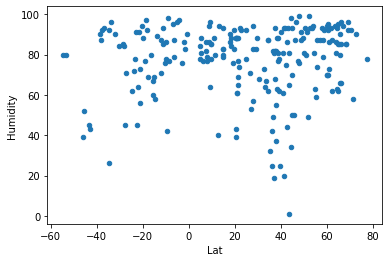

In [36]:
south_hem.plot(kind = 'scatter',x = 'Lat',y = 'Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

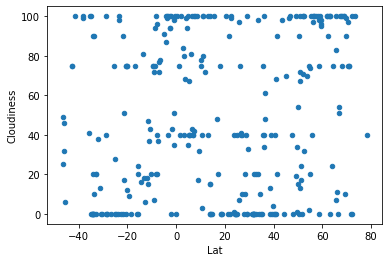

In [37]:
north_hem.plot(kind = 'scatter',x = 'Lat',y = 'Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

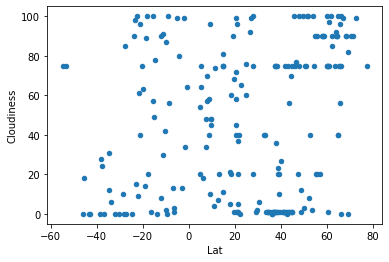

In [38]:
south_hem.plot(kind = 'scatter',x = 'Lat',y = 'Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

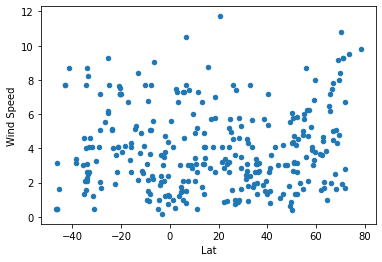

In [39]:
north_hem.plot(kind = 'scatter',x = 'Lat',y = 'Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

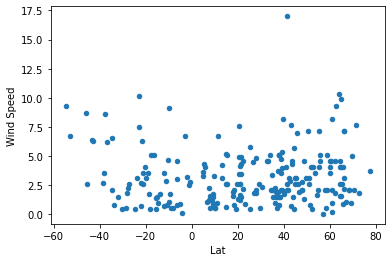

In [40]:
south_hem.plot(kind = 'scatter',x = 'Lat',y = 'Wind Speed')
plt.show()